In [1]:
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential, Model

In [2]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 12s 0us/step


In [4]:
train_images, test_images = train_images / 255.0, test_images / 255.0

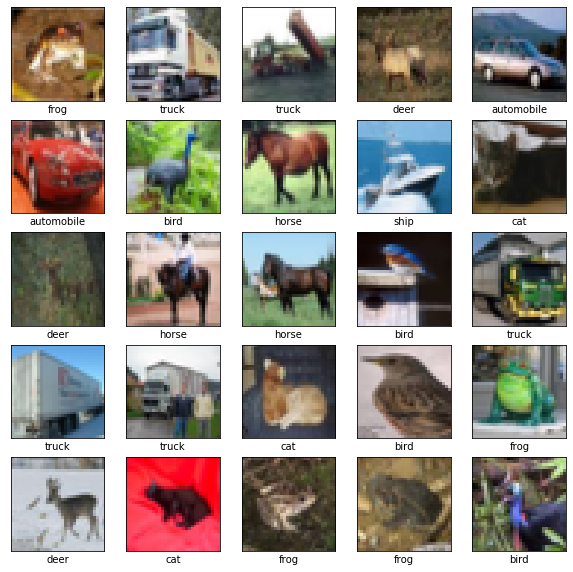

In [8]:
import matplotlib.pyplot as plt

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
              'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # CIFAR labels happen to be arrays
    # which is why you need an extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [9]:
train_images[0].shape

(32, 32, 3)

In [11]:
32*32*3

3072

In [12]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dens

In [13]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [14]:
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 64s 1ms/sample - loss: 1.5595 - acc: 0.4276 - val_loss: 1.3017 - val_acc: 0.5300
Epoch 2/10
50000/50000 [==============================] - 58s 1ms/sample - loss: 1.1953 - acc: 0.5745 - val_loss: 1.1008 - val_acc: 0.6087
Epoch 3/10
50000/50000 [==============================] - 57s 1ms/sample - loss: 1.0483 - acc: 0.6313 - val_loss: 1.0602 - val_acc: 0.6272
Epoch 4/10
50000/50000 [==============================] - 55s 1ms/sample - loss: 0.9466 - acc: 0.6650 - val_loss: 0.9744 - val_acc: 0.6651
Epoch 5/10
50000/50000 [==============================] - 57s 1ms/sample - loss: 0.8756 - acc: 0.6930 - val_loss: 0.9439 - val_acc: 0.6723
Epoch 6/10
50000/50000 [==============================] - 58s 1ms/sample - loss: 0.8204 - acc: 0.7138 - val_loss: 0.8832 - val_acc: 0.6937
Epoch 7/10
50000/50000 [==============================] - 58s 1ms/sample - loss: 0.7757 - acc: 0.7284 - val_loss: 0.

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

 - 4s - loss: 0.8686 - acc: 0.7041


In [19]:
import numpy as np

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

res = ResNet50(input_shape=(224, 224, 3), weights='imagenet', include_top=False)

for layer in res.layers:
    layer.trainable=False
    
x = res.output
x = GlobalAveragePooling2D()(x) # this layer is really a fancy flatten
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(res.input, predictions)

In [20]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalizationV1) (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [26]:
from skimage.io import imread_collection
from skimage.transform import resize
import numpy as np

from sklearn.model_selection import train_test_split

forests = '/Users/mattmastin/Desktop/DS9/u4s3/module2-convolutional-neural-networks/data/forest/*.jpg'
mountains = '/Users/mattmastin/Desktop/DS9/u4s3/module2-convolutional-neural-networks/data/mountain/*jpg'

# create collection with available images
forests = imread_collection(forests).concatenate()
mountains = imread_collection(mountains).concatenate()

y_0 = np.zeros(forests.shape[0])
y_1 = np.ones(mountains.shape[0])

X = np.concatenate([forests, mountains])
X.shape

(702, 256, 256, 3)

In [27]:
X = resize(X, (702, 224, 224, 3))
y = np.concatenate([y_0, y_1])

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

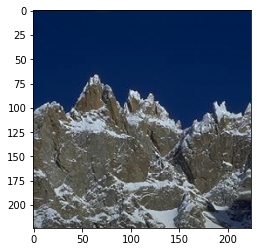

In [28]:
import matplotlib.pyplot as plt
plt.imshow(X[356]);

In [29]:
# fit model

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X, y, epochs=5, validation_split=0.2)

Train on 561 samples, validate on 141 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
561/561 [==============================] - 141s 251ms/sample - loss: 0.4273 - acc: 0.8699 - val_loss: 1.6553 - val_acc: 0.0000e+00
Epoch 2/5
561/561 [==============================] - 136s 242ms/sample - loss: 0.0425 - acc: 0.9875 - val_loss: 1.8279 - val_acc: 0.0000e+00
Epoch 3/5
561/561 [==============================] - 131s 234ms/sample - loss: 0.0489 - acc: 0.9822 - val_loss: 1.9496 - val_acc: 0.0000e+00
Epoch 4/5
561/561 [==============================] - 142s 253ms/sample - loss: 0.0162 - acc: 0.9947 - val_loss: 1.8099 - val_acc: 0.0000e+00
Epoch 5/5
561/561 [==============================] - 147s 261ms/sample - loss: 0.0047 - acc: 1.0000 - val_loss: 1.7001 - val_acc: 0.0000e+00


In [31]:
# Custom CNN Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, (10,10), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D((5,5)))
model.add(Conv2D(64, (5,5), activation='relu'))
model.add(MaxPooling2D((3,3)))
model.add(Conv2D(64, (5,5), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 215, 215, 32)      9632      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 43, 43, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 39, 39, 64)        51264     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 9, 9, 64)          102464    
_________________________________________________________________
flatten_1 (Flatten)          (None, 5184)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                331840    
__________

In [32]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [33]:
model.fit(X, y, epochs=5, validation_split=0.2)

Train on 561 samples, validate on 141 samples
Epoch 1/5
561/561 [==============================] - 34s 61ms/sample - loss: 0.5601 - acc: 0.7255 - val_loss: 0.5917 - val_acc: 0.7376
Epoch 2/5
561/561 [==============================] - 24s 42ms/sample - loss: 0.3929 - acc: 0.8734 - val_loss: 0.7114 - val_acc: 0.6170
Epoch 3/5
561/561 [==============================] - 24s 43ms/sample - loss: 0.3139 - acc: 0.8717 - val_loss: 1.1488 - val_acc: 0.3901
Epoch 4/5
561/561 [==============================] - 29s 51ms/sample - loss: 0.2736 - acc: 0.8841 - val_loss: 0.2035 - val_acc: 0.9291
Epoch 5/5
561/561 [==============================] - 26s 46ms/sample - loss: 0.2071 - acc: 0.9162 - val_loss: 0.3820 - val_acc: 0.8511
